In [149]:
# IMPORTS

import folium
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
import numpy as np
import json
import requests
import pandas as pd
import nltk
import spacy
from spacy.lang.fr.examples import sentences
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('popular')
nltk.corpus.stopwords.words("english")
nltk.corpus.stopwords.words("french")
nltk.download('punkt_tab')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from math import radians, cos, sin, asin, sqrt

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package movie_reviews is already

#NLP




1. Créer une fonction `fclean` qui permet de nettoyer les stopwords (ANGLAIS) et la ponctuation.

In [150]:
def fclean(sentence):

  tokens = nltk.word_tokenize(sentence.lower())

  tokens_clean = []
  for words in tokens:
    if words not in nltk.corpus.stopwords.words("english") and words.isalpha() == True:
      tokens_clean.append(words)

  str_tokens_clean = " ".join(tokens_clean)
  return str_tokens_clean

2. Renvoyer le résultat de `"Hello, how are you? Fine, thank you."` à travers cette fonction

In [151]:
sentence = "Hello, how are you? Fine, thank you."
fclean(sentence)

'hello fine thank'

3. Charger le fichier `'reviews_amazon_new.csv'`

4. Appliquer la fonction précdente à l'avis et créer une nouvelle colonne `'clean'`

---



In [152]:
df_amazon_reviews = pd.read_csv('/Users/kilian/Documents/GitHub/Cours---Wild-Code-School/BD/reviews_amazon_new.csv')

In [153]:
df_amazon_reviews['reviews.text'] = df_amazon_reviews['reviews.text'].astype(str)
df_amazon_reviews['clean'] = df_amazon_reviews['reviews.text'].apply(fclean)

5. Créer une colonne `'sentiment'` qui sera `'good'` si reviews.rating > 3 et `'bad'` sinon

In [154]:
df_amazon_reviews['sentiment'] = ''
df_amazon_reviews['sentiment'] = df_amazon_reviews['reviews.rating'].apply(lambda x : 'good' if x > 3 else 'bad')

6. X sera la colonne `'clean'` et y sera la colonne `'sentiment'`

In [155]:
X = df_amazon_reviews['clean']
y = df_amazon_reviews['sentiment']

7. Faire un train test split avec `random_state=42` et `train_size = 0.75`

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

7. Entrainer `CountVectorizer()` (bag of words) sur X_train

8. Appliquer `CountVectorizer()` sur X_train et X_test pour obtenir X_train_bw et X_test_bw

In [157]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_bw = vectorizer.transform(X_train)
X_test_bw = vectorizer.transform(X_test)

9. Entrainer maintenant une régression logistique sur X_train_bw et y_train

In [158]:
lr = LogisticRegression().fit(X_train_bw, y_train)

10. Afficher le score d'entrainement et le score de test

In [159]:
print('Train score =', round(lr.score(X_train_bw, y_train), 3))
print('Test score =', round(lr.score(X_test_bw, y_test), 3))

Train score = 0.966
Test score = 0.938


11. Faire une prédiction sur `"I had an outstanding experience with this service. The team was incredibly helpful and responsive, quickly addressing all my queries and concerns. Every interaction was marked by professionalism and a genuine attention to detail. I'm truly impressed by their commitment to customer satisfaction and would highly recommend them to anyone looking for quality service."`

12. Et sur `"I was quite disappointed with the service provided. The response time was slow, and when I did get a response, it lacked the necessary detail and clarity. There seemed to be a lack of coordination among the team members, leading to a frustrating experience. Unfortunately, this did not meet my expectations based on their reputation, and I would hesitate to use their services again."`

In [160]:
sentence1 = "I had an outstanding experience with this service. The team was incredibly helpful and responsive, quickly addressing all my queries and concerns. Every interaction was marked by professionalism and a genuine attention to detail. I'm truly impressed by their commitment to customer satisfaction and would highly recommend them to anyone looking for quality service."
sentence2 = "I was quite disappointed with the service provided. The response time was slow, and when I did get a response, it lacked the necessary detail and clarity. There seemed to be a lack of coordination among the team members, leading to a frustrating experience. Unfortunately, this did not meet my expectations based on their reputation, and I would hesitate to use their services again."

In [161]:
df_amazon_sentences = pd.DataFrame(columns = df_amazon_reviews.columns, index = [0, 1])

df_amazon_sentences.loc[0, 'reviews.text'] = sentence1
df_amazon_sentences.loc[1, 'reviews.text'] = sentence2

df_amazon_sentences['clean'] = df_amazon_sentences['reviews.text'].apply(fclean)

X = df_amazon_sentences['clean']

X_bw = vectorizer.transform(X)

y_pred = lr.predict(X_bw)

display(y_pred)

array(['good', 'bad'], dtype=object)

# JSON

Le contenu sur lequel vous allez travailler se trouve dans le fichier `weather_data.json`

1. Écrire une fonction `load_weather_data(filename)` qui charge les données JSON depuis le fichier spécifié et les renvoie sous forme d'une liste de dictionnaires.



In [162]:
def load_weather_data(link):

  with open(link, 'r') as file:
      data = json.load(file)

  return data

In [163]:
data = load_weather_data('/Users/kilian/Documents/GitHub/Cours---Wild-Code-School/BD/weather_data.json')

2. Écrire une fonction `get_city_data(city, data)` qui prend en paramètre un nom de ville et les données météo, et renvoie les données pour cette ville uniquement.



In [164]:
def get_city_data(city, data):

    liste_villes = []
    for n in range(len(data)):
      liste_villes.append(data[n]['city'])

    if city not in liste_villes:
      return f"La ville de {city} n'est pas présente dans les données."

    else:
      for n in range(len(data)):
        if data[n]['city'] == city:
          print(f"Date: {data[n]['date']}.")
          print(f"Le temps à {city} est {data[n]['weather_description']}.")
          print(f"Température à {city} : {data[n]['temperature']}.")
          print(f"Humidité à {city} : {data[n]['humidity']}.")
          print(f"Vitesse du vent à {city} : {data[n]['wind_speed']}.\n")


In [165]:
get_city_data('Paris', data)

Date: 2023-05-01.
Le temps à Paris est Partly cloudy.
Température à Paris : 15.5.
Humidité à Paris : 60.
Vitesse du vent à Paris : 10.2.

Date: 2023-05-02.
Le temps à Paris est Overcast.
Température à Paris : 16.8.
Humidité à Paris : 58.
Vitesse du vent à Paris : 12.1.

Date: 2023-05-03.
Le temps à Paris est Sunny.
Température à Paris : 18.3.
Humidité à Paris : 55.
Vitesse du vent à Paris : 14.6.



3. Écrire une fonction `average_temperature(city, data)` qui calcule la température moyenne pour une ville donnée.



In [166]:
def average_temperature(city, data):

    liste_villes = []
    for n in range(len(data)):
      liste_villes.append(data[n]['city'])

    if city not in liste_villes:
      return f"La ville de {city} n'est pas présente dans les données."

    else:
      sum_temperature = 0
      compteur = 0
      for n in range(len(data)):
        if data[n]['city'] == city:
          sum_temperature += data[n]['temperature']
          compteur += 1

      average_temperature = round(sum_temperature/compteur, 2)

      return average_temperature

In [167]:
average_temperature('Paris', data)

16.87

4. Écrire une fonction `max_wind_speed(data)` qui renvoie la valeur maximale de vitesse du vent dans les données, toutes villes confondues.



In [168]:
def max_wind_speed(city, data):

    liste_villes = []
    for n in range(len(data)):
      liste_villes.append(data[n]['city'])

    if city not in liste_villes:
      return f"La ville de {city} n'est pas présente dans les données."

    else:
      liste_vent = []
      for n in range(len(data)):
        if data[n]['city'] == city:
          liste_vent.append(data[n]['wind_speed'])

      max_wind_speed = max(liste_vent)

      return max_wind_speed

In [169]:
max_wind_speed('Paris', data)

14.6

5. Écrire une fonction `count_weather_conditions(data)` qui renvoie un dictionnaire avec le décompte du nombre d'occurrences de chaque type de temps (`weather_description`) dans les données.



In [170]:
def count_weather_conditions(data):

    liste_type_temps = []

    for n in range(len(data)):
        liste_type_temps.append(data[n]['weather_description'])

    set_type_temps = list(set(liste_type_temps))

    dico_type_temps = {}

    for n in range(len(set_type_temps)):
        dico_type_temps.update({set_type_temps[n] : liste_type_temps.count(set_type_temps[n])})

    return dico_type_temps


In [171]:
count_weather_conditions(data)

{'Partly cloudy': 2, 'Overcast': 1, 'Sunny': 2}

6. Écrire une fonction `write_city_summary(city, data, filename)` qui écrit un résumé des données d'une ville dans un fichier JSON. Inclure la température moyenne, l'humidité moyenne, la vitesse moyenne du vent et le nombre d'occurrences de chaque condition météo.
Exemple de format :

```json
{
  "city": "Paris",
  "avg_temperature": 16.87,
  "avg_humidity": 57.67,
  "avg_wind_speed": 12.3,
  "weather_counts": {
    "Partly cloudy": 1,
    "Overcast": 1,
    "Sunny": 1
  }
}
```

In [172]:
def write_city_summary(city, data, filename):

    liste_villes = []
    for n in range(len(data)):
      liste_villes.append(data[n]['city'])

    if city not in liste_villes:
      return f"La ville de {city} n'est pas présente dans les données."

    else:
      sum_temperature = 0
      sum_humidity = 0
      sum_wind_speed = 0
      compteur = 0
      liste_type_temps = []

      for n in range(len(data)):
        if data[n]['city'] == city:
          liste_type_temps.append(data[n]['weather_description'])
          sum_temperature += data[n]['temperature']
          sum_humidity += data[n]['humidity']
          sum_wind_speed += data[n]['wind_speed']
          compteur += 1

      average_temperature = round(sum_temperature/compteur, 2)
      average_humidity = round(sum_humidity/compteur, 2)
      average_wind_speed = round(sum_wind_speed/compteur, 2)

    set_type_temps = list(set(liste_type_temps))

    dico_type_temps = {}

    for n in range(len(set_type_temps)):
        dico_type_temps.update({set_type_temps[n] : liste_type_temps.count(set_type_temps[n])})

    sorted_dico_type_temps = dict(sorted(dico_type_temps.items(), key=lambda item: item[0]))

    dico_final = {'city' : city,'avg_temperature' : average_temperature,'avg_humidity' : average_humidity,'avg_wind_speed' : average_wind_speed,'weather_counts' : sorted_dico_type_temps}

    with open(filename, 'w') as f:
        json.dump(dico_final, f)

In [173]:
write_city_summary('Paris', data, 'data_paris')

In [174]:
load_weather_data('/Users/kilian/Documents/GitHub/Cours---Wild-Code-School/BD/data_paris')

{'city': 'Paris',
 'avg_temperature': 16.87,
 'avg_humidity': 57.67,
 'avg_wind_speed': 12.3,
 'weather_counts': {'Overcast': 1, 'Partly cloudy': 1, 'Sunny': 1}}

# Pandas

1. Lire le fichier CSV et afficher un aperçu des données.



In [175]:
df_sales = pd.read_csv('/Users/kilian/Documents/GitHub/Cours---Wild-Code-School/BD/messy_sales_data.csv')

2. Vérifier et nettoyer les valeurs manquantes dans chaque colonne :
   - Supprimer les lignes où les valeurs sont manquantes pour les colonnes 'product_id', 'category', 'price' ou 'quantity'.
   - Pour les colonnes 'total' et 'discount', remplacer les valeurs manquantes par 0.
   - Pour la colonne 'payment_method', remplacer les valeurs manquantes par 'Unknown'.



In [176]:
df_sales['price'] = df_sales['price'].astype(float)
df_sales['quantity'] = df_sales['quantity'].astype(float)

df_sales['total'] = df_sales['price'] * df_sales['quantity']

In [177]:
df_sales.loc[4, 'category'] = np.nan
df_sales['category'] = df_sales['category'].fillna('Unknown')
df_sales['category'] = df_sales['category'].astype(str)
df_sales['category'] = df_sales['category'].apply(lambda x : x.replace(' ',''))

df_sales.loc[1, 'payment_method'] = np.nan
df_sales['payment_method'] = df_sales['payment_method'].fillna('Unknown')
df_sales['payment_method'] = df_sales['payment_method'].astype(str)
df_sales['payment_method'] = df_sales['payment_method'].apply(lambda x : x.replace(' ',''))

df_sales = df_sales[
(df_sales['product_id'].isna() == False) &
(df_sales['category'].isna() == False) &
(df_sales['price'].isna() == False) &
(df_sales['quantity'].isna() == False)]

df_sales[['total', 'discount']] = df_sales[['total', 'discount']].fillna(0)

3. Identifier et corriger les erreurs de type dans les colonnes :
   - Convertir la colonne 'date' en type DatetimeIndex. Les lignes avec des dates invalides devront être supprimées.
   - Corriger le type de la colonne 'quantity' (doit être un entier positif).
   - Corriger le type de la colonne 'discount' (doit être un float entre 0 et 1).
   - Identifiez toute autre colonne contenant des valeurs de type incorrect et appliquez les corrections nécessaires.



In [178]:
datetime.strptime(df_sales['date'].iloc[0], '%Y-%m-%d').date()
for n in range(len(df_sales)):
    try:
      df_sales.loc[n, 'date'] = datetime.strptime(df_sales.loc[n, 'date'], '%Y-%m-%d').date()
    except:
      df_sales.loc[n, 'date'] = 'A supprimer'

df_sales = df_sales[df_sales['date'] != 'A supprimer']
df_sales = df_sales[df_sales['date'] != '2023-02-29']
df_sales = df_sales[df_sales['quantity'] >= 0]
df_sales['quantity'] = df_sales['quantity'].astype(int)
df_sales['discount'] = df_sales['discount'].astype(float)
df_sales = df_sales[df_sales['discount'] <= 1]
df_sales['total'] = df_sales['total'].astype(str)
df_sales['total'] = df_sales['total'].apply(lambda x : x.replace('O', '0'))
df_sales['total'] = df_sales['total'].astype(float)

4. Trouver et traiter les valeurs aberrantes :
   - Identifier les prix (colonne 'price') qui sont en dehors de l'intervalle [moyenne - 3 * écart type, moyenne + 3 * écart type]. Remplacer ces valeurs aberrantes par la médiane des prix.  
   - De même, identifier et corriger les valeurs aberrantes dans la colonne 'quantity'.



In [179]:
nombres = df_sales['price'].to_list()
moyenne = sum(nombres) / len(nombres)
variance = sum((x - moyenne) ** 2 for x in nombres) / len(nombres)
ecart_type = math.sqrt(variance)
intervalle_inf = moyenne - 3*ecart_type
intervalle_sup = moyenne + 3*ecart_type
df_sales['price_intervalle'] = ''
df_sales['price_intervalle'] = df_sales['price'].apply(lambda x : 'IN' if x > intervalle_inf and x < intervalle_sup else 'OUT')

nombres = df_sales['quantity'].to_list()
moyenne = sum(nombres) / len(nombres)
variance = sum((x - moyenne) ** 2 for x in nombres) / len(nombres)
ecart_type = math.sqrt(variance)
intervalle_inf = moyenne - 3*ecart_type
intervalle_sup = moyenne + 3*ecart_type
df_sales['quantity_intervalle'] = ''
df_sales['quantity_intervalle'] = df_sales['quantity'].apply(lambda x : 'IN' if x > intervalle_inf and x < intervalle_sup else 'OUT')

5. Ajouter une colonne 'revenue' qui est calculée en multipliant price, quantity et en appliquant la remise (discount) éventuelle.



In [180]:
df_sales['revenue'] = df_sales['price'] * df_sales['quantity'] * (1-df_sales['discount'])

6. Calculer le chiffre d'affaires total, le nombre de ventes et le panier moyen. Comparer ces indicateurs avant et après le traitement des valeurs aberrantes.



In [181]:
CA_total = sum(df_sales['revenue'].to_list())
ventes = sum(df_sales['quantity'].to_list())

In [182]:
CA_total, ventes

(7254.5, 85)

In [183]:
f'Panier moyen: Quantité : {round(ventes / len(df_sales), 2)}, Valeur : {round(CA_total / len(df_sales), 2)}'

'Panier moyen: Quantité : 8.5, Valeur : 725.45'

7. Trouver les 5 villes où le chiffre d'affaires est le plus élevé. Calculer leur contribution en pourcentage du chiffre d'affaires total.



In [184]:
df_ville = df_sales[['city', 'revenue']].groupby('city').sum().reset_index().sort_values(by = 'revenue', ascending = False).head()
df_ville['poucentage_contribution'] = round(df_ville['revenue'] / CA_total *100, 2)

In [185]:
df_ville

,city,revenue,poucentage_contribution
6,Paris,2018.0,27.82
1,Lyon,1220.0,16.82
7,Toulouse,960.0,13.23
2,Marseille,900.0,12.41
5,Nice,760.0,10.48


8. Calculer le chiffre d'affaires par catégorie de produit et par méthode de paiement. Afficher les résultats sous forme d'un graphique à barres empilées.


In [186]:
df_cat_method = df_sales[['category', 'payment_method', 'revenue']].groupby(['category', 'payment_method']).sum().reset_index()

In [187]:
categories = list(set(df_cat_method['category'].to_list()))

In [188]:
payment_methods = list(set(df_cat_method['payment_method'].to_list()))

In [189]:
df = pd.DataFrame(columns = categories, index = payment_methods)

for n in range(len(df_cat_method)):
  df.loc[df_cat_method['payment_method'].iloc[n], df_cat_method['category'].iloc[n]] = df_cat_method['revenue'].iloc[n]

df = df.fillna(0)

/var/folders/2b/18xblx_n4lv24wz932vjckrm0000gp/T/ipykernel_3846/87036098.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


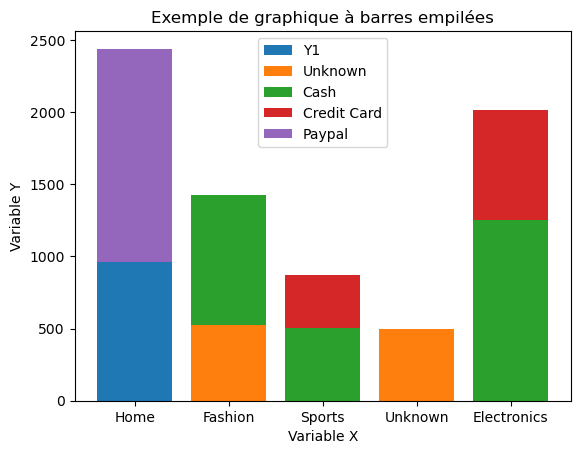

In [190]:
x = categories
liste1 = df.iloc[0].to_list()
liste2 = df.iloc[1].to_list()
liste3 = df.iloc[2].to_list()
liste4 = df.iloc[3].to_list()
liste5 = df.iloc[4].to_list()

# Création du graphique à barres empilées
fig, ax = plt.subplots()
ax.bar(x, liste1, label="Y1")
ax.bar(x, liste2, bottom=liste1, label="Unknown")
ax.bar(x, liste3, bottom=np.array(liste1) + np.array(liste2), label="Cash")
ax.bar(x, liste4, bottom=np.array(liste1) + np.array(liste2)+ np.array(liste3), label="Credit Card")
ax.bar(x, liste5, bottom=np.array(liste1) + np.array(liste2)+ np.array(liste3)+ np.array(liste4), label="Paypal")

# Configuration des axes
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")
ax.set_title("Exemple de graphique à barres empilées")
ax.legend()

# Affichage de la figure (surtout utile, si MPL est utilisé de manière standalone)
plt.show()


9. Calculer le chiffre d'affaires par jour et tracer l'évolution des ventes sur la période. Ajouter une courbe de tendance polynomial d'ordre 2.



In [191]:
df_dates = df_sales[['date', 'revenue']].groupby('date').sum().reset_index()

In [192]:
df_dates

,date,revenue
0,2023-01-01,1970.0
1,2023-01-02,1668.0
2,2023-01-03,1460.0
3,2023-01-04,760.0
4,2023-01-05,364.5
5,2023-01-06,528.0
6,2023-01-07,504.0


In [193]:
data = df_dates,
x = df_dates['date']
y = df_dates['revenue']

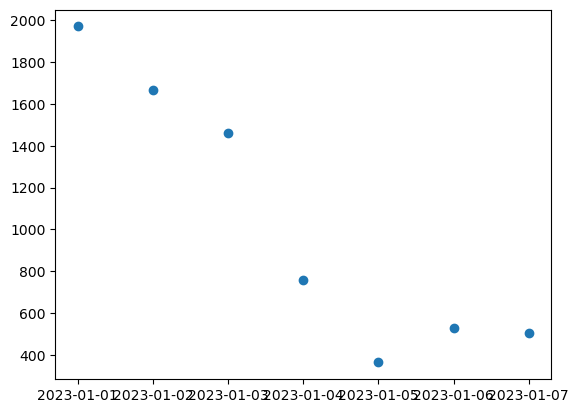

In [194]:
plt.scatter(data = df_dates,
            x = 'date',
            y = 'revenue');

10. Identifier les 5 produits les plus vendus et les 5 produits qui ont généré le plus de chiffre d'affaires. Comparer ces résultats avec ceux obtenus avant le traitement des valeurs aberrantes.



In [195]:
top_revenue = df_sales[['product_id', 'revenue']].groupby('product_id').sum().reset_index().sort_values(by = 'revenue', ascending = False).head()
top_quantité =df_sales[['product_id', 'quantity']].groupby('product_id').sum().reset_index().sort_values(by = 'quantity', ascending = False).head()

In [196]:
top_revenue

,product_id,revenue
0,A1,1750.0
1,B2,1680.0
3,D4,900.0
2,C3,768.0
4,F6,760.0


In [197]:
top_quantité

,product_id,quantity
1,B2,22
4,F6,20
3,D4,15
2,C3,8
0,A1,7


11. Calculer le montant total des remises accordées et le pourcentage que cela représente par rapport au chiffre d'affaires brut (avant remise). Faire cette analyse par catégorie de produit.

In [198]:
df_sales['discount_somme'] = df_sales['total'] * df_sales['discount']

In [199]:
df_remises = df_sales[['category', 'total', 'discount_somme']].groupby('category').sum().reset_index()

In [200]:
df_remises['pourcentage'] = round((df_remises['discount_somme'] / df_remises['total']) * 100, 2)

In [201]:
df_remises

,category,total,discount_somme,pourcentage
0,Electronics,2210.0,192.0,8.69
1,Fashion,1560.0,132.0,8.46
2,Home,2560.0,120.0,4.69
3,Sports,1125.0,256.5,22.80
4,Unknown,500.0,0.0,0.00


# Geocoding



Le fichier `restaurants_new.csv` comprend une sélection de restaurants du Lot et Garonne.

1. Utiliser l'API adresse.data.gouv.fr (https://adresse.data.gouv.fr/api-doc/adresse) pour trouver les coordonnées gps de chaque entrée


In [202]:
df_restaurants = pd.read_csv('/Users/kilian/Documents/GitHub/Cours---Wild-Code-School/BD/restaurants_new.csv')

df_restaurants[['adresse_1', 'adresse_2', 'adresse_3']] = df_restaurants[['adresse_1', 'adresse_2', 'adresse_3']].fillna('')
df_restaurants['code_posta'] =df_restaurants['code_posta'].astype(str)

In [203]:
df_restaurants['API_adresse'] = df_restaurants.apply(lambda x : 'https://api-adresse.data.gouv.fr/search/?q=' + (x['adresse_1'] + x['adresse_2'] + x['adresse_3']).replace(' ','+').replace(' - ','+').replace('é','e').replace('ô','o').replace('è','e').replace('â','a') +'&postcode=' + x['code_posta'], axis = 1)

In [204]:
df_restaurants['point'] = ''

In [205]:
for n in range(len(df_restaurants)):
  link = df_restaurants['API_adresse'].iloc[n]
  r = requests.get(link).json()
  try:
    resultat = r['features'][0]['geometry']['coordinates'][::-1]
  except IndexError:
    resultat = ''
    pass

  df_restaurants['point'].iloc[n] = resultat

/var/folders/2b/18xblx_n4lv24wz932vjckrm0000gp/T/ipykernel_3846/1672998424.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_restaurants['point'].iloc[n] = resultat
/var/folders/2b/18xblx_n4lv24wz932vjckrm0000gp/T/ipykernel_3846/167299


2. Positionner ces lieux sur une carte à l'aide de la librairie Folium

In [206]:
df_restaurants = df_restaurants[df_restaurants['point'] != '']

m = folium.Map(location=df_restaurants['point'].iloc[0],zoom_start=11)

for n in range(len(df_restaurants)):
    point = df_restaurants['point'].iloc[n]

    folium.Marker(
        location=point,
        popup= df_restaurants['raison_soc'].iloc[n]
        ).add_to(m)

m

## Bonus de Jo

3. Pour chaque restaurant, calculer la distance qui le separe de la mairie d'Agen situee Place Docteur Esquirol, 47000 Agen. Vous pouvez utiliser la formule de Haversine pour calculer la distance a vol d'oiseau entre deux points GPS.

La formule de Haversine est une equation utilisee pour calculer la distance a vol d'oiseau entre deux points sur une sphere a partir de leurs coordonnees GPS (latitude et longitude).

Elle tient compte de la courbure de la Terre, ce qui la rend plus precise que de simplement calculer la distance Euclidienne entre deux points.

La formule est la suivante :

d = 2 * r * arcsin(sqrt((sin((lat2 - lat1) / 2))² + cos(lat1) * cos(lat2) * (sin((lon2 - lon1) / 2))²))

Ou :
- d est la distance entre les deux points
- r est le rayon de la sphere (rayon moyen de la Terre ~ 6371 km)
- lat1, lon1 sont la latitude et longitude du point 1
- lat2, lon2 sont la latitude et longitude du point 2
- arcsin, sqrt, sin, cos sont des fonctions mathematiques

Vous pouvez commencer ainsi :

```python
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # à vous la suite !
```

In [207]:
adresse = 'Place Docteur Esquirol'
code_postal = '47000'
ville = 'Agen'

link = 'https://api-adresse.data.gouv.fr/search/?q=' + adresse.replace(' ','+').replace(' - ','+').replace('é','e').replace('ô','o').replace('è','e').replace('â','a') +'&postcode=' + code_postal

r = requests.get(link).json()
try:
    resultat = r['features'][0]['geometry']['coordinates'][::-1]
except IndexError:
    resultat = ''
pass

lat_mairie = resultat[0]
lon_mairie = resultat[1]

4. Ajouter une colonne "distance_mairie" au dataframe contenant pour chaque restaurant sa distance a la mairie d'Agen.



In [208]:
def haversine(lon1, lat1, lon2, lat2):
    r = 6371
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    d = 2 * r * asin(sqrt((sin((lat2 - lat1)/ 2))**2 + cos(lat1) * cos(lat2) * (sin((lon2 - lon1) / 2))**2))
                            
    return d

df_restaurants['distance_mairie'] = df_restaurants['point'].apply(lambda x : haversine(lon_mairie, lat_mairie, x[1], x[0] if type(x) == list else 'Inconnu'))

5. Creer une carte avec un marqueur different pour les restaurants de chaque commune. Ajouter une legende a la carte pour indiquer a quelle commune correspond chaque type de marqueur.


In [214]:
liste_villes = list(df_restaurants['commune'].unique())

In [215]:
couleurs = ['yellow', 'green', 'blue', 'red', 'violet', 'brown', 'gray', 'black', 'white', 'rose', 'cyan', 'orange', 'beige', 'indigo', 'turquoise', 'gold', 'dark gray']

In [216]:
len(liste_villes), len(couleurs)

(17, 17)

In [217]:
dict_ville_couleur = {}

for n in range(len(liste_villes)):
    dict_ville_couleur.update({liste_villes[n] : couleurs[n]})

In [218]:
dict_ville_couleur

{'AGEN': 'yellow',
 'FOULAYRONNES': 'green',
 'BOE': 'blue',
 'SERIGNAC-SUR-GARONNE': 'red',
 'ROQUEFORT': 'violet',
 'LAPLUME': 'brown',
 'BON-ENCONTRE': 'gray',
 'MOIRAX': 'black',
 'LE PASSAGE': 'white',
 'CAUDECOSTE': 'rose',
 'LAYRAC': 'cyan',
 'ASTAFFORT': 'orange',
 'BRAX': 'beige',
 'SAINT-HILAIRE-DE-LUSIGNAN': 'indigo',
 'ESTILLAC': 'turquoise',
 'COLAYRAC-SAINT-CIRQ': 'gold',
 'SAINT-SIXTE': 'dark gray'}

In [219]:
df_restaurants['commune'].iloc[0]

'AGEN'

In [220]:
dict_ville_couleur[df_restaurants['commune'].iloc[0]]

'yellow'

In [221]:
df_restaurants = df_restaurants[df_restaurants['point'] != '']

m = folium.Map(location=df_restaurants['point'].iloc[0],zoom_start=11)

for n in range(len(df_restaurants)):
    point = df_restaurants['point'].iloc[n]
    couleur = dict_ville_couleur[df_restaurants['commune'].iloc[n]]

    folium.Marker(
        location=point,
        popup= df_restaurants['raison_soc'],
        icon=folium.Icon(color=couleur),
        ).add_to(m)
m

/var/folders/2b/18xblx_n4lv24wz932vjckrm0000gp/T/ipykernel_3846/3082521345.py:12: UserWarning: color argument of Icon should be one of: {'black', 'darkpurple', 'beige', 'lightred', 'pink', 'darkgreen', 'lightgray', 'gray', 'lightblue', 'orange', 'darkred', 'red', 'purple', 'blue', 'darkblue', 'green', 'cadetblue', 'white', 'lightgreen'}.
  icon=folium.Icon(color=couleur),



6. Ajouter un cercle ou polygone representant la zone a moins de 5km de la mairie d'Agen.



In [222]:
folium.Circle(resultat, popup = "Agen", radius = 5000).add_to(m)

m

7. Sauvegarder la carte interactive au format html dans un fichier nomme "restaurants_agen.html".

In [223]:
m.save("map.html")